# Exploration: events over time
Event is characterized by:
- coming from corrected corpus
- having a single date-tag with daily resolution
    - sometimes achieved using a heuristic (see df_prim['date_uncertainity'])
- text length > 50 characters

In [1]:
import re
import ndjson
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# import primitives
path_primitives_daily = '../data/primitives_220331/primitives_corrected_daily.ndjson'
with open(path_primitives_daily) as fin:
    primitives_daily = ndjson.load(fin)

# crude prim
path_primitives_all = '../data/primitives_220331/primitives_corrected.ndjson'
with open(path_primitives_all) as fin:
    primitives_all = ndjson.load(fin)

In [24]:
df_prim = pd.DataFrame(primitives_daily)
df_prim['doc_len'] = [len(doc) for doc in df_prim['text'].tolist()]

df_events = df_prim.query('doc_len >= 50')
df_events.head()

print('\n'.join([
    f'all events: \t\t\t\t {len(primitives_all)}',
    f'daily-res events: \t\t\t {len(df_prim)}',
    f'daily-res events longer than 50: \t {len(df_events)}'
]))

all events: 				 41512
daily-res events: 			 25599
daily-res events longer than 50: 	 22394


# chronicles
## event length per chronicle

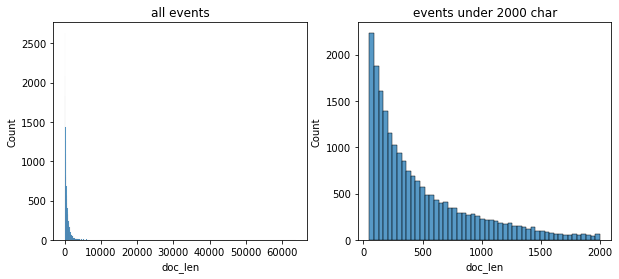

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_events['doc_len'], ax=axs[0])
axs[0].title.set_text('all events')
sns.histplot(df_events['doc_len'].loc[lambda x: x < 2000], ax=axs[1])
axs[1].title.set_text('events under 2000 char')

In [45]:
event_len_desc = (df_events
    .groupby('call_nr')
    ['doc_len'].describe()
    .sort_values('mean', ascending=False)
    .round(2)
)

event_len_desc

,count,mean,std,min,25%,50%,75%,max
call_nr,,,,,,,,
1577_Utre_Anon,16.0,4567.75,5440.29,79.0,154.00,3055.5,6457.75,17732.0
1568_Gent_Vaer,545.0,3640.89,4964.05,96.0,1031.00,2190.0,4643.00,63781.0
1567_Amst_Reae,31.0,2332.32,2148.64,69.0,971.50,1526.0,2798.50,8611.0
1604_Bosc_Anon,67.0,2162.13,3104.11,52.0,149.00,1145.0,2684.00,15996.0
1576_Zier_Clae,19.0,1607.63,1312.52,92.0,894.50,1090.0,2122.00,5853.0
...,...,...,...,...,...,...,...,...
1716_Jisp_Anon,295.0,223.13,242.93,50.0,96.50,155.0,274.00,2484.0
1675_Brug_Cler,199.0,202.41,138.18,52.0,106.00,165.0,244.50,932.0
1721_Antw_Anon,185.0,196.06,186.89,50.0,86.00,131.0,213.00,1112.0


## n events per chronicle

<AxesSubplot:xlabel='call_nr', ylabel='count'>

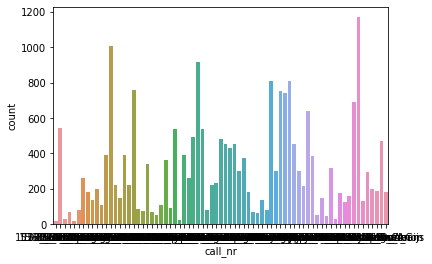

In [50]:
sns.barplot(
    x=event_len_desc.reset_index()['call_nr'],
    y=event_len_desc.reset_index()['count']
)

In [54]:
(event_len_desc
    .reset_index()
    .sort_values('count', ascending=False)
    [['call_nr', 'count']]
)

,call_nr,count
66,1802_Venl_Post,1171.0
12,1574_Antw_Haec,1004.0
31,1668_Gent_Bill_12,917.0
51,1581_Haar_Verw,809.0
47,1575_Antw_Ulle,806.0
...,...,...
61,1666_Gent_Bill_01B,31.0
2,1567_Amst_Reae,31.0
27,1582_Stee_Steg,20.0
4,1576_Zier_Clae,19.0


# dates
## events per day (replication of all_daily_date_tags)

In [25]:
# summarize date occurances
days = (df_events
    .groupby('clean_date')
    .size()
    .to_frame(name='count')
    .reset_index()
)
# tag unique
days['unique'] = [False if n > 1 else True for n in days['count'].tolist()]

# extract year
days['year'] = [int(re.match(r'\d{4}', tag).group(0)) for tag in days['clean_date'].tolist()]
# get rid of ridiculous dates 
days = days.query('year >= 1400 & year < 1800')

In [28]:
days.sort_values('count', ascending=False).head(20)

,clean_date,count,unique,year
11536,1773-07-21,67,False,1773
11681,1776-09-14,63,False,1776
11624,1775-11-14,50,False,1775
12686,1788-05-27,42,False,1788
11158,1747-05-03,24,False,1747
1443,1566-08-24,17,False,1566
10821,1717-12-25,15,False,1717
12558,1787-11-02,15,False,1787
11625,1775-11-15,14,False,1775
1625,1567-03-14,14,False,1567


<AxesSubplot:xlabel='year', ylabel='n_dates'>

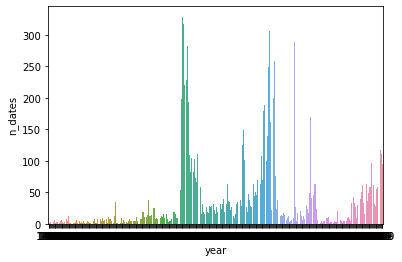

In [29]:
props_unique_yearly = []
for year_tag, year_data in days.groupby('year'):
    n_records = len(year_data)
    proportion_unique = sum(year_data['unique']) / n_records
    props_unique_yearly.append({
        'year': year_tag,
        'n_dates': n_records,
        'proportion_unique': proportion_unique, 
    })

props_unique_yearly = pd.DataFrame(props_unique_yearly)

# plot
sns.barplot(
    x=props_unique_yearly['year'],
    y=props_unique_yearly['n_dates']
)

### Concatenating daily tags to decades
unique vs non-unique date tag density

In [31]:
days['decade'] = [re.match(r'\d{4}', tag).group(0) for tag in days['clean_date'].tolist()]
days['decade'] = [int(year[0:3]) for year in days['decade'].tolist()]

props_unique_decade= []
for decade_tag, decade_data in days.groupby('decade'):
    n_records = len(decade_data)
    proportion_unique = sum(decade_data['unique']) / n_records
    props_unique_decade.append({
        'decade': decade_tag,
        'n_dates': n_records,
        'proportion_unique': proportion_unique, 
    })

props_unique_decade = pd.DataFrame(props_unique_decade)

Text(0.5, 1.0, 'n daily tags per decade')

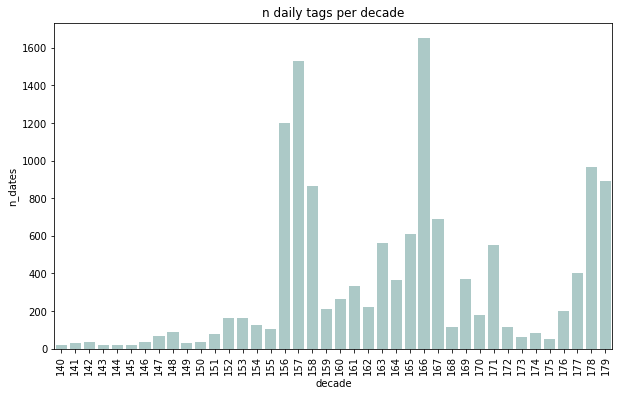

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['n_dates'],
    color='#A7CECB'
)
plt.xticks(rotation=90)
plt.title('n daily tags per decade')

Text(0.5, 1.0, 'proportion of unique daily tags per decade (non-unique in dark)')

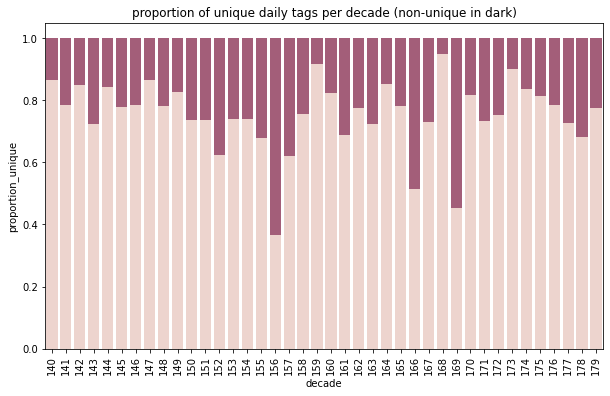

In [33]:
plt.figure(figsize=(10, 6))
props_unique_decade['top'] = 1
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['top'],
    color='#AE5377'
)
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['proportion_unique'],
    color='#F2D1C9'
)
plt.xticks(rotation=90)
plt.title('proportion of unique daily tags per decade (non-unique in dark)')

Text(0.5, 1.0, 'n daily tags + proportion of unique (non-unique in dark)')

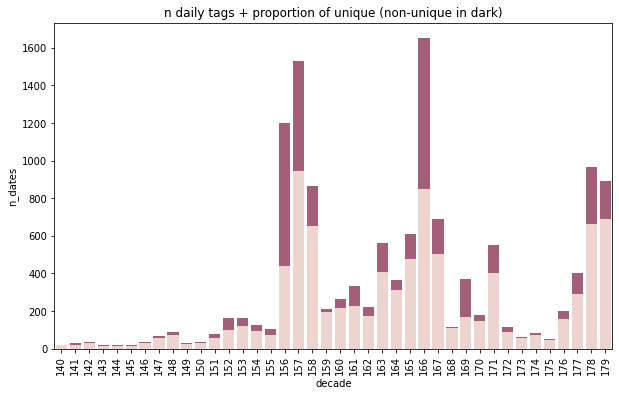

In [34]:
plt.figure(figsize=(10, 6))
props_unique_decade['top'] = 1
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['n_dates'],
    color='#AE5377'
)
sns.barplot(
    x=props_unique_decade['decade'],
    y=props_unique_decade['n_dates'] * props_unique_decade['proportion_unique'],
    color='#F2D1C9'
)
plt.xticks(rotation=90)
plt.title('n daily tags + proportion of unique (non-unique in dark)')